In [1]:
import scprep
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scanpy as sc

# Spatial Data

In [2]:
file = open('/data/fenggao/spatial_magan/All_data_experiment_all_ChrCha_Spatial_anndata_list.pkl', 'rb')
spatial_data = pickle.load(file)
file.close()

In [4]:
rna_adata

AnnData object with n_obs × n_vars = 178488 × 64591
    obs: 'Sample', 'Barcode', 'old_Sample', 'Tissue', 'Replicate', 'cellIDs'
    var: 'ID', 'Symbol', 'Type', 'GeneSymbol', 'Organism', 'Ensembl'

In [3]:
s5 = spatial_data[0]
s5

AnnData object with n_obs × n_vars = 1415 × 64591
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome', 'Gene', 'Ensembl'
    uns: 'images', 'scalefactors'
    obsm: 'X_spatial'

In [6]:
print(s5.obs.shape)
print('array_row min: {}, max: {}'.format(min(s5.obs['array_row']), max(s5.obs['array_row'])))
print('array_col min: {}, max: {}'.format(min(s5.obs['array_col']), max(s5.obs['array_col'])))
s5.obs

(1415, 4)
array_row min: 12, max: 67
array_col min: 7, max: 120


,in_tissue,array_row,array_col,Sample
AAACAAGTATCTCCCA-1,1,50,102,Annelie_S5
AAACGAGACGGTTGAT-1,1,35,79,Annelie_S5
AAACTCGGTTCGCAAT-1,1,66,70,Annelie_S5
AAACTGCTGGCTCCAA-1,1,45,67,Annelie_S5
AAAGGCTCTCGCGCCG-1,1,55,55,Annelie_S5
...,...,...,...,...
TTGTGGCCCTGACAGT-1,1,18,60,Annelie_S5
TTGTGTATGCCACCAA-1,1,56,60,Annelie_S5
TTGTGTTTCCCGAAAG-1,1,51,59,Annelie_S5
TTGTTCAGTGTGCTAC-1,1,24,64,Annelie_S5


In [30]:
print(s5.var.shape)
print('genomes: {}'.format(set(s5.var.genome)))
genes = s5.var.Gene[s5.var.Gene.str.startswith("MT-")]
print('genes with human mitochondria: \n{}'.format(genes))
human_genome_spatial = s5.var[s5.var.genome == 'GRCh38']
print('num human genome = {}'.format(len(human_genome_spatial)))
s5.var

(64591, 5)
genomes: {'mm10', 'GRCh38'}
genes with human mitochondria: 
GRCh38_MT-ND1      MT-ND1
GRCh38_MT-ND2      MT-ND2
GRCh38_MT-CO1      MT-CO1
GRCh38_MT-CO2      MT-CO2
GRCh38_MT-ATP8    MT-ATP8
GRCh38_MT-ATP6    MT-ATP6
GRCh38_MT-CO3      MT-CO3
GRCh38_MT-ND3      MT-ND3
GRCh38_MT-ND4L    MT-ND4L
GRCh38_MT-ND4      MT-ND4
GRCh38_MT-ND5      MT-ND5
GRCh38_MT-ND6      MT-ND6
GRCh38_MT-CYB      MT-CYB
Name: Gene, dtype: object
num human genome = 33538


,gene_ids,feature_types,genome,Gene,Ensembl
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38,MIR1302-2HG,ENSG00000243485
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38,FAM138A,ENSG00000237613
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38,OR4F5,ENSG00000186092
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,AL627309.1,ENSG00000238009
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38,AL627309.3,ENSG00000239945
...,...,...,...,...,...
mm10_AC168977.1,mm10_ENSMUSG00000079808,Gene Expression,mm10,AC168977.1,ENSMUSG00000079808
mm10_AC149090.1,mm10_ENSMUSG00000095041,Gene Expression,mm10,AC149090.1,ENSMUSG00000095041
mm10_CAAA01118383.1,mm10_ENSMUSG00000063897,Gene Expression,mm10,CAAA01118383.1,ENSMUSG00000063897
mm10_Vmn2r122,mm10_ENSMUSG00000096730,Gene Expression,mm10,Vmn2r122,ENSMUSG00000096730


(2000, 2000, 3)


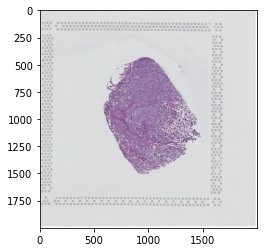

In [8]:
images = s5.uns['images']
scalefactors = s5.uns['scalefactors']
print(images['hires'].shape)
plt.imshow(images['hires'])

In [17]:
images['hires'][1000][1000]

array([0.61312276, 0.45799953, 0.6431678 ], dtype=float32)

In [9]:
print(images['lowres'].shape)
# plt.imshow(images['lowres'])

(600, 600, 3)


In [10]:
for key, val in scalefactors.items():
    print('{}: {}'.format(key, val))

spot_diameter_fullres: 377.83725199901045
tissue_hires_scalef: 0.03792476
fiducial_diameter_fullres: 610.3524839984015
tissue_lowres_scalef: 0.011377427


<AxesSubplot:>

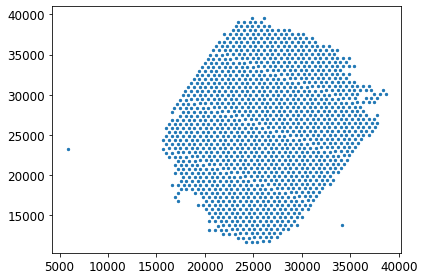

In [11]:
s5.obsm
scprep.plot.scatter2d(s5.obsm['X_spatial'])

In [18]:
spatial = s5.obsm['X_spatial']
print(spatial.shape)
print('X_spatial row min: {}, max: {}'.format(min(spatial[:][0]), max(spatial[:][0])))  # range: 2352
print('X_spatial col min: {}, max: {}'.format(min(spatial[:][1]), max(spatial[:][1])))  # range: 3364

(1415, 2)
X_spatial row min: 31046, max: 33397
X_spatial col min: 23408, max: 26771


(1415, 64591)


<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

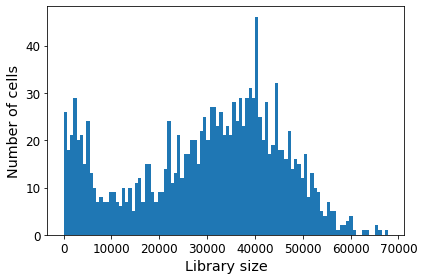

In [4]:
spatial_adata = s5.X.toarray()
print(spatial_adata.shape)
scprep.plot.plot_library_size(spatial_adata, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

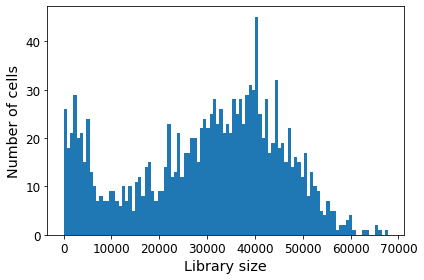

In [14]:
spatial_adata = scprep.filter.filter_rare_genes(spatial_adata)
scprep.plot.plot_library_size(spatial_adata, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

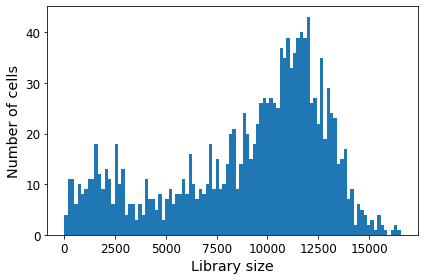

In [15]:
spatial_adata = scprep.transform.sqrt(spatial_adata)
scprep.plot.plot_library_size(spatial_adata, log='False')

# Unfiltered RNA Seq Data

In [25]:
rna = sc.read('/data/anniegao/spatial_magan/Raw_experiment_all_unfiltered_counts_AnnData.h5ad')
rna

AnnData object with n_obs × n_vars = 178488 × 64591
    obs: 'Sample', 'Barcode', 'old_Sample', 'Tissue', 'Replicate', 'cellIDs'
    var: 'ID', 'Symbol', 'Type', 'GeneSymbol', 'Organism', 'Ensembl'

In [5]:
rna.obs

,Sample,Barcode,old_Sample,Tissue,Replicate,cellIDs
1_AAACCTGAGAAACCGC-1,Liver_1,AAACCTGAGAAACCGC-1,43973_Liver_Met,Liver,1,1_AAACCTGAGAAACCGC-1
1_AAACCTGAGAAGGGTA-1,Liver_1,AAACCTGAGAAGGGTA-1,43973_Liver_Met,Liver,1,1_AAACCTGAGAAGGGTA-1
1_AAACCTGAGACGCTTT-1,Liver_1,AAACCTGAGACGCTTT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGACGCTTT-1
1_AAACCTGAGCCAGGAT-1,Liver_1,AAACCTGAGCCAGGAT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGCCAGGAT-1
1_AAACCTGAGGCATGGT-1,Liver_1,AAACCTGAGGCATGGT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGGCATGGT-1
...,...,...,...,...,...,...
19_TTTGTCATCACGCATA-1,Primary_4,TTTGTCATCACGCATA-1,M43979_PT,Primary,4,19_TTTGTCATCACGCATA-1
19_TTTGTCATCAGAAATG-1,Primary_4,TTTGTCATCAGAAATG-1,M43979_PT,Primary,4,19_TTTGTCATCAGAAATG-1
19_TTTGTCATCCCATTAT-1,Primary_4,TTTGTCATCCCATTAT-1,M43979_PT,Primary,4,19_TTTGTCATCCCATTAT-1
19_TTTGTCATCGGGAGTA-1,Primary_4,TTTGTCATCGGGAGTA-1,M43979_PT,Primary,4,19_TTTGTCATCGGGAGTA-1


In [31]:
print('genomes: {}'.format(set(rna.var.Organism)))
genes = rna.var.GeneSymbol[rna.var.GeneSymbol.str.startswith("MT-")]
print('genes with human mitochondria: \n{}'.format(genes))
human_genome_rna = rna.var[rna.var.Organism == 'GRCh38']
print('num human genome = {}'.format(len(human_genome_rna)))
rna.var

genomes: {'mm10', 'GRCh38'}
genes with human mitochondria: 
MT-ND1      MT-ND1
MT-ND2      MT-ND2
MT-CO1      MT-CO1
MT-CO2      MT-CO2
MT-ATP8    MT-ATP8
MT-ATP6    MT-ATP6
MT-CO3      MT-CO3
MT-ND3      MT-ND3
MT-ND4L    MT-ND4L
MT-ND4      MT-ND4
MT-ND5      MT-ND5
MT-ND6      MT-ND6
MT-CYB      MT-CYB
Name: GeneSymbol, dtype: category
Categories (64515, object): ['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610009O20Rik', ..., 'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6']
num human genome = 33538


,ID,Symbol,Type,GeneSymbol,Organism,Ensembl
MIR1302-2HG,GRCh38_ENSG00000243485,GRCh38_MIR1302-2HG,Gene Expression,MIR1302-2HG,GRCh38,ENSG00000243485
FAM138A,GRCh38_ENSG00000237613,GRCh38_FAM138A,Gene Expression,FAM138A,GRCh38,ENSG00000237613
OR4F5,GRCh38_ENSG00000186092,GRCh38_OR4F5,Gene Expression,OR4F5,GRCh38,ENSG00000186092
AL627309.1,GRCh38_ENSG00000238009,GRCh38_AL627309.1,Gene Expression,AL627309.1,GRCh38,ENSG00000238009
AL627309.3,GRCh38_ENSG00000239945,GRCh38_AL627309.3,Gene Expression,AL627309.3,GRCh38,ENSG00000239945
...,...,...,...,...,...,...
AC168977.1,mm10___ENSMUSG00000079808,mm10___AC168977.1,Gene Expression,AC168977.1,mm10,ENSMUSG00000079808
AC149090.1,mm10___ENSMUSG00000095041,mm10___AC149090.1,Gene Expression,AC149090.1,mm10,ENSMUSG00000095041
CAAA01118383.1,mm10___ENSMUSG00000063897,mm10___CAAA01118383.1,Gene Expression,CAAA01118383.1,mm10,ENSMUSG00000063897
Vmn2r122,mm10___ENSMUSG00000096730,mm10___Vmn2r122,Gene Expression,Vmn2r122,mm10,ENSMUSG00000096730


In [9]:
rna_adata = rna.X.toarray()
print(rna_adata.shape)
rna_adata

(178488, 64591)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

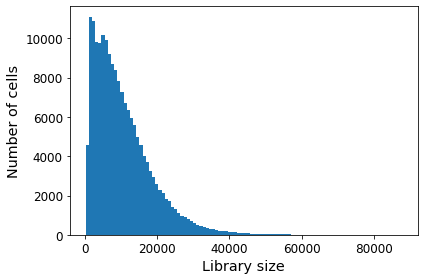

In [10]:
scprep.plot.plot_library_size(rna_adata, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

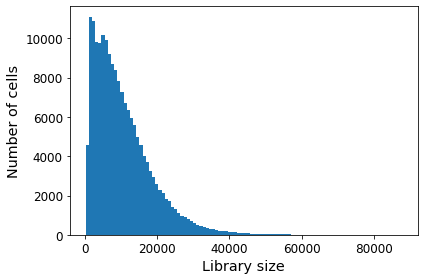

In [11]:
rna_adata = scprep.filter.filter_rare_genes(rna_adata)
scprep.plot.plot_library_size(rna_adata, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

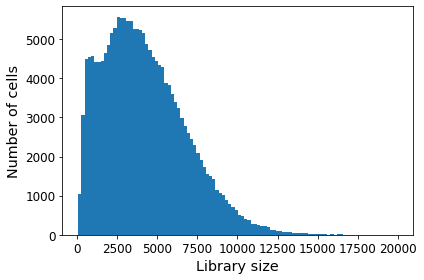

In [12]:
rna_adata = scprep.transform.sqrt(rna_adata)
scprep.plot.plot_library_size(rna_adata, log='False')

# Prefiltered AnnData

In [3]:
adata = sc.read('/data/fenggao/spatial_magan/Prefiltered_experiment_all_normalised_AnnData_PHATE_clusterings.h5ad')
adata

AnnData object with n_obs × n_vars = 140813 × 5551
    obs: 'Sample', 'Barcode', 'old_Sample', 'Tissue', 'Replicate', 'cellIDs', 'Human_percent', 'Human_cells', 'Lib_size', 'Genes_detected', 'Mito_percent', 'Practice_subset', 'Mito_percent_discard', 'Genes_detected_discard', 'Libsize_discard', 'discard', 'Spectral_3_cluster', 'Spectral_4_cluster', 'Spectral_5_cluster', 'Spectral_6_cluster', 'Spectral_7_cluster', 'Spectral_8_cluster', 'Spectral_9_cluster', 'Leiden_start_cluster_0.2_opt', 'Leiden_start_cluster_0.3_opt', 'Leiden_start_cluster_0.4_opt', 'Leiden_start_cluster_0.5_opt', 'Leiden_start_cluster_0.6_opt', 'Leiden_start_cluster_0.7_opt', 'Leiden_start_cluster_0.8_opt', 'Leiden_start_cluster_0.9_opt', 'Leiden_start_cluster_1.0_opt'
    var: 'ID', 'Symbol', 'Type', 'GeneSymbol', 'Organism', 'Ensembl', 'Liver_active', 'LN_active', 'Lung_active', 'Primary_active', 'Any_Active', 'highly_variable_whole', 'highly_variable_rep_1', 'highly_variable_rep_2', 'highly_variable_rep_3', 'highly

In [4]:
adata.obs

,Sample,Barcode,old_Sample,Tissue,Replicate,cellIDs,Human_percent,Human_cells,Lib_size,Genes_detected,...,Spectral_9_cluster,Leiden_start_cluster_0.2_opt,Leiden_start_cluster_0.3_opt,Leiden_start_cluster_0.4_opt,Leiden_start_cluster_0.5_opt,Leiden_start_cluster_0.6_opt,Leiden_start_cluster_0.7_opt,Leiden_start_cluster_0.8_opt,Leiden_start_cluster_0.9_opt,Leiden_start_cluster_1.0_opt
1_AAACCTGAGAAACCGC-1,Liver_1,AAACCTGAGAAACCGC-1,43973_Liver_Met,Liver,1,1_AAACCTGAGAAACCGC-1,99.876868,True,30012,5353,...,8,3,4,5,7,8,9,9,10,10
1_AAACCTGAGAAGGGTA-1,Liver_1,AAACCTGAGAAGGGTA-1,43973_Liver_Met,Liver,1,1_AAACCTGAGAAGGGTA-1,99.889164,True,11716,3163,...,5,1,2,3,3,4,5,4,4,4
1_AAACCTGAGACGCTTT-1,Liver_1,AAACCTGAGACGCTTT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGACGCTTT-1,99.849936,True,13973,3791,...,7,3,4,5,7,8,9,3,3,10
1_AAACCTGAGCCAGGAT-1,Liver_1,AAACCTGAGCCAGGAT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGCCAGGAT-1,99.903257,True,6196,2363,...,5,1,2,3,4,5,7,5,7,7
1_AAACCTGAGGCATGGT-1,Liver_1,AAACCTGAGGCATGGT-1,43973_Liver_Met,Liver,1,1_AAACCTGAGGCATGGT-1,99.653922,True,6047,2183,...,3,1,0,1,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19_TTTGTCAGTTCAGCGC-1,Primary_4,TTTGTCAGTTCAGCGC-1,M43979_PT,Primary,4,19_TTTGTCAGTTCAGCGC-1,99.921701,True,16590,4255,...,5,1,2,3,4,5,7,5,7,7
19_TTTGTCATCACGCATA-1,Primary_4,TTTGTCATCACGCATA-1,M43979_PT,Primary,4,19_TTTGTCATCACGCATA-1,99.380805,True,963,645,...,1,0,0,0,1,1,1,1,1,1
19_TTTGTCATCAGAAATG-1,Primary_4,TTTGTCATCAGAAATG-1,M43979_PT,Primary,4,19_TTTGTCATCAGAAATG-1,99.957188,True,11674,3240,...,7,3,4,5,2,3,3,3,3,3
19_TTTGTCATCCCATTAT-1,Primary_4,TTTGTCATCCCATTAT-1,M43979_PT,Primary,4,19_TTTGTCATCCCATTAT-1,99.929867,True,9974,3032,...,4,3,4,5,2,3,3,3,3,3


In [6]:
adata.var

,ID,Symbol,Type,GeneSymbol,Organism,Ensembl,Liver_active,LN_active,Lung_active,Primary_active,Any_Active,highly_variable_whole,highly_variable_rep_1,highly_variable_rep_2,highly_variable_rep_3,highly_variable_rep_4,HVG_num,highly_variable
NOC2L,GRCh38_ENSG00000188976,GRCh38_NOC2L,Gene Expression,NOC2L,GRCh38,ENSG00000188976,True,True,True,True,True,True,True,True,True,True,4,True
ISG15,GRCh38_ENSG00000187608,GRCh38_ISG15,Gene Expression,ISG15,GRCh38,ENSG00000187608,True,True,True,True,True,True,True,True,True,True,4,True
AGRN,GRCh38_ENSG00000188157,GRCh38_AGRN,Gene Expression,AGRN,GRCh38,ENSG00000188157,True,True,True,True,True,True,True,False,False,True,2,True
SDF4,GRCh38_ENSG00000078808,GRCh38_SDF4,Gene Expression,SDF4,GRCh38,ENSG00000078808,True,True,True,True,True,True,True,False,True,True,3,True
UBE2J2,GRCh38_ENSG00000160087,GRCh38_UBE2J2,Gene Expression,UBE2J2,GRCh38,ENSG00000160087,True,True,True,True,True,False,True,True,False,False,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,GRCh38_ENSG00000212907,GRCh38_MT-ND4L,Gene Expression,MT-ND4L,GRCh38,ENSG00000212907,True,True,True,True,True,True,True,True,True,True,4,True
MT-ND4,GRCh38_ENSG00000198886,GRCh38_MT-ND4,Gene Expression,MT-ND4,GRCh38,ENSG00000198886,True,True,True,True,True,True,True,True,True,True,4,True
MT-ND5,GRCh38_ENSG00000198786,GRCh38_MT-ND5,Gene Expression,MT-ND5,GRCh38,ENSG00000198786,True,True,True,True,True,True,True,True,True,True,4,True
MT-ND6,GRCh38_ENSG00000198695,GRCh38_MT-ND6,Gene Expression,MT-ND6,GRCh38,ENSG00000198695,True,True,True,True,True,True,True,True,True,True,4,True


<AxesSubplot:>

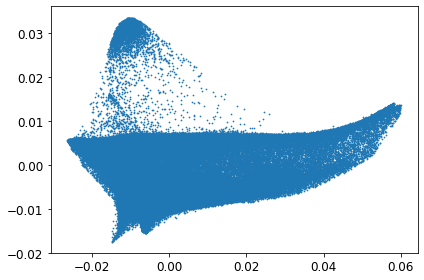

In [7]:
scprep.plot.scatter2d(adata.obsm['X_phate_MNN'])

<AxesSubplot:>

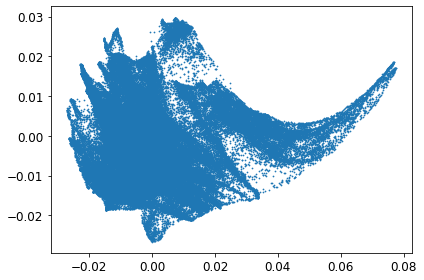

In [9]:
scprep.plot.scatter2d(adata.obsm['X_phate_nobatch'])

In [6]:
adata_data = adata.X.toarray()
print(adata_data.shape)
adata_data

(140813, 5551)


array([[ 0.28671956, -1.0372977 , -0.3916501 , ..., -1.2367742 ,
         0.02306795, -0.8362508 ],
       [ 0.3942809 , -0.11338943,  0.53225815, ..., -0.2553115 ,
        -0.5541765 ,  1.8178916 ],
       [ 0.6668411 ,  0.15917075, -0.3916501 , ..., -0.68055916,
         0.9111921 , -0.56027985],
       ...,
       [ 0.4879433 ,  0.64135873, -0.39232627, ..., -0.6921387 ,
        -0.4220656 , -2.3801208 ],
       [ 0.5636874 ,  0.5245353 ,  1.0238004 , ...,  0.24337578,
        -0.4220656 ,  1.7793436 ],
       [-0.43766528, -1.2098584 , -0.39232627, ...,  0.7518215 ,
        -0.4220656 , -1.2413473 ]], dtype=float32)

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

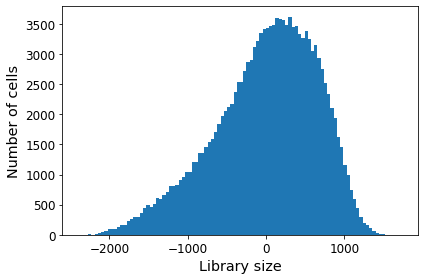

In [7]:
scprep.plot.plot_library_size(adata_data, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

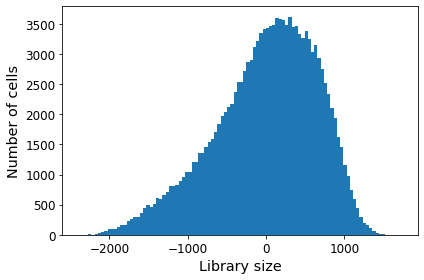

In [8]:
adata_data = scprep.filter.filter_rare_genes(adata_data)
scprep.plot.plot_library_size(adata_data, log='False')

# Old dataset

In [3]:
path = '/data/fenggao/spatial_magan/R_200620_SCOYOU_INT_10X_Visium/scott/Visium/Annelie_S5/outs/raw_feature_bc_matrix'
data = scprep.io.load_10X(path)
print(data.shape)

/home/anniegao/spatial_magan/venv/lib/python3.8/site-packages/scprep/io/tenx.py:43: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(


(4992, 32285)


In [12]:
data.head

<bound method NDFrame.head of                     Sox17 (ENSMUSG00000025902)  Mrpl15 (ENSMUSG00000033845)  \
0                                                                             
AAACAACGAATAGTTC-1                         0.0                          0.0   
AAACAAGTATCTCCCA-1                         0.0                          1.0   
AAACAATCTACTAGCA-1                         0.0                          0.0   
AAACACCAATAACTGC-1                         0.0                          0.0   
AAACAGAGCGACTCCT-1                         0.0                          0.0   
...                                        ...                          ...   
TTGTTTCACATCCAGG-1                         0.0                          0.0   
TTGTTTCATTAGTCTA-1                         0.0                          0.0   
TTGTTTCCATACAACT-1                         0.0                          0.0   
TTGTTTGTATTACACG-1                         0.0                          0.0   
TTGTTTGTGTAAATTC-1    

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

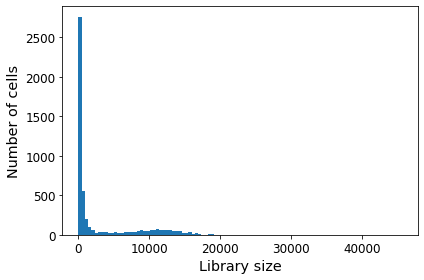

In [6]:
data = scprep.filter.filter_rare_genes(data)
scprep.plot.plot_library_size(data, log='False')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

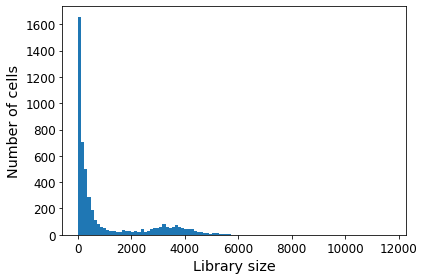

In [18]:
data = np.nan_to_num(data, copy=False)
data = scprep.transform.sqrt(data)
scprep.plot.plot_library_size(data, log='False')